# Support Academic Improvement with Data Engineering

In [41]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import linalg
import math as math
from sympy import Matrix
import scipy.sparse as sp
import scipy.sparse.linalg
import scipy.linalg as la
import sympy
from numpy import array
from numpy.linalg import svd
from numpy import zeros
from numpy import diag
from matplotlib.image import imread
import os
import pandas_profiling
from pandas_profiling import ProfileReport

Imagine you are creating a study team to increase your GPA
Get out your list of subjecto studied at UPY so far, including all courses
for which you have obtained a grade 


Here we have the data of 5 students of the UPY. we will perform a SVD to analyze the 
information in order to undertand the data. 





In [4]:
#Here we have the grades of five students 
df = pd.read_csv("grade_adrianaKu.csv")
df

,Code,name,date,Grade,Grade1,Grade2,Grade3,Grade4
0,CERTI,CERTIFICACIÓN DEL IDIOMA INGLÉS I,06/12/2019,8,7,10,9,7
1,LE52500,INTRODUCCIÓN A LA LENGUA INGLESA,05/12/2019,8,9,10,9,7
2,CB07502,QUÍMICA BÁSICA,24/04/2020,10,10,10,8,7
3,CB07533,FÍSICA,24/04/2020,10,8,10,10,7
4,CB12032,ÁLGEBRA LINEAL,24/04/2020,10,10,10,10,7
5,CD07520,INTRODUCCIÓN A LA INGENIERÍA DE DATOS,24/04/2020,9,9,10,9,8
6,CH07507,EXPRESIÓN ORAL Y ESCRITA I,23/04/2020,9,8,10,8,7
7,LE10501,INGLÉS I,24/04/2020,8,9,10,9,8
8,SW10525,FUNDAMENTOS DE ALGORITMOS,24/04/2020,10,10,10,10,9
9,CB08034,FUNCIONES MATEMÁTICAS,04/08/2020,10,8,10,9,7


## Experiment 

We are going to perform an interesting experiment. 
we will work with two matrices.

1. An Ordered matrix
For this matrix we divide the subjects into five categories. shown in the image below

2. Unordered matrix
we process the data as it is in the df. 

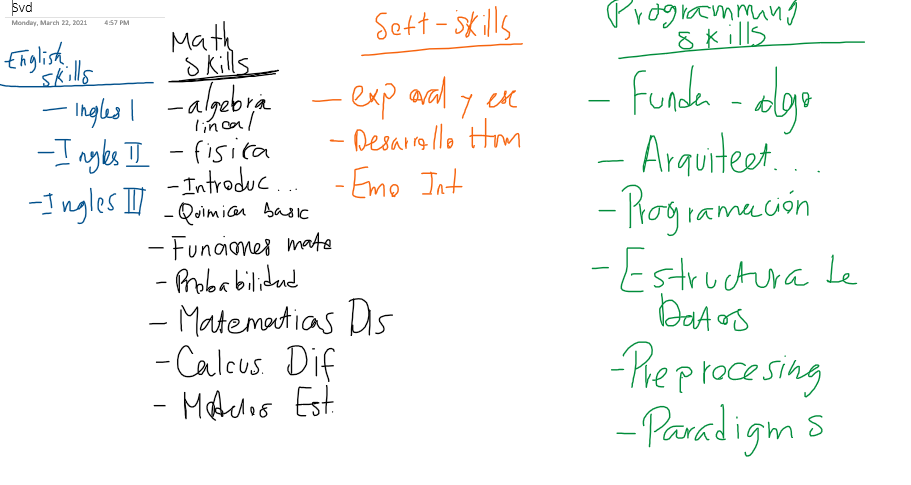

In [40]:
#Trasnform the Matrix
#getting the columns name
it = list(df["Code"])
#we turn the matrix
A = np.array(df[["Grade", "Grade1","Grade2","Grade3", "Grade4"]])
A2 = A.T
#new df2
df2 =pd.DataFrame(A2)
df2.head()
#changing the names 
df2.columns=it
df2

,CERTI,LE52500,CB07502,CB07533,CB12032,CD07520,CH07507,LE10501,SW10525,CB08034,...,SW11019,SW11020,CB06007,CD09001,CD09002,CERTIFII,CH04502,LE10503,SW07521,SW07522
0,8,8,10,10,10,9,9,8,10,10,...,10,10,10,10,10,8,10,10,10,10
1,7,9,10,8,10,9,8,9,10,8,...,9,8,9,10,10,10,9,10,10,10
2,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
3,9,9,8,10,10,9,8,9,10,9,...,8,9,10,9,8,10,9,10,10,10
4,7,7,7,7,7,8,7,8,9,7,...,7,8,7,8,7,8,9,8,8,8


## 1. Ordered Matrix 

In [38]:
#we reorder the data based on the new criteria
columns2 = [it[0],it[1],it[7],it[12],it[19],it[21],it[2],it[3],it[4],it[9],it[10],it[15],it[16],it[18],it[6],it[11],it[20],it[5],it[8],it[13],it[14],it[17],it[22],it[23]]
print(len(columns2))
df3 = df2[columns2]
df3

24


,CERTI,LE52500,LE10501,LE10511,CERTIFII,LE10503,CB07502,CB07533,CB12032,CB08034,...,CH07507,CH04501,CH04502,CD07520,SW10525,SD10011,SW11019,CD09001,SW07521,SW07522
0,8,8,8,9,8,10,10,10,10,10,...,9,10,10,9,10,10,10,10,10,10
1,7,9,9,10,10,10,10,8,10,8,...,8,8,9,9,10,10,9,10,10,10
2,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
3,9,9,9,9,10,10,8,10,10,9,...,8,8,9,9,10,10,8,9,10,10
4,7,7,8,9,8,8,7,7,7,7,...,7,8,9,8,9,10,7,8,8,8


Before we start working with the Matrix, we need to desing a new way to interprent the matrix. In this case 
I suggest to have a new matrix of the shape A 5x21. There are five rows because we are 5 students. 
The rows represent The number of subject and their grades per each subject.

we find four possible groups in which the subjects fit. they are: 

english_skills, math_skills, soft_skills, programming_skills.

The shape will be still the same A 5x21. the order will change. 

In [32]:
# we create an array from the df
data_1 = np.array(df3)
#first part
w_1_1 = data_1.dot(data_1.T)
e_value_1_1, e_vector_1_1 = np.linalg.eigh(w_1_1)

#second stage
w_1_2 = data_1.T.dot(data_1)
e_value_1_2,e_vector_1_2 = np.linalg.eigh(w_1_2)

print("Original Data Shape: ", data_1.shape)
print("dot(A,A.T) Eigen Value: ", e_value_1_1.shape)
print("dot(A,A.T) Eigen Vector: ",e_vector_1_1.shape)
print("dot(A.T,A) Eigen Value: ",e_value_1_2.shape)
print("dot(A.T,A) Eigen Vector: ",e_vector_1_2.shape)



Original Data Shape:  (5, 24)
dot(A,A.T) Eigen Value:  (5,)
dot(A,A.T) Eigen Vector:  (5, 5)
dot(A.T,A) Eigen Value:  (24,)
dot(A.T,A) Eigen Vector:  (24, 24)


In [33]:
idx_1_1 = e_value_1_1.argsort()[::-1]
e_value_1_1 = e_value_1_1[idx_1_1]
e_vector_1_1 = e_vector_1_1[:,idx_1_1]

idx_1_2 = e_value_1_2.argsort()[::-1]
e_value_1_2 = e_value_1_2[idx_1_2]
e_vector_1_2 = e_vector_1_2[:,idx_1_2]

#compare the eigen vectors and see if their non zero elements are equal
rows_1_1 = np.nonzero(e_value_1_1)
rows_1_2 = np.nonzero(e_value_1_2)
non_zero_1_1 = e_value_1_1[rows_1_1].copy()
non_zero_1_2 = e_value_1_2[rows_1_2].copy()

print("Sqrt Root Sum of One : ", np.sqrt(non_zero_1_1**2).sum())
print("Sqrt Root Sum of Two : ", np.sqrt(non_zero_1_2**2).sum())

print("\n----------")
print("Number of Non Zero Eigen Values ", (non_zero_1_1!=0).sum())
print("Number of Non Zero Eigen Values ", (non_zero_1_2!=0).sum())

print("\n----------")
print("Number of Small Eigen Values ", (non_zero_1_1>1e-5).sum())
print("Number of Small Eigen Values ", (non_zero_1_2>1e-5).sum())

print(non_zero_1_1)
print(non_zero_1_2)

Sqrt Root Sum of One :  10155.000000000002
Sqrt Root Sum of Two :  10155.000000000005

----------
Number of Non Zero Eigen Values  5
Number of Non Zero Eigen Values  24

----------
Number of Small Eigen Values  5
Number of Small Eigen Values  5
[1.01111780e+04 1.64993939e+01 1.22024111e+01 9.88853655e+00
 5.23165005e+00]
[ 1.01111780e+04  1.64993939e+01  1.22024111e+01  9.88853655e+00
  5.23165005e+00  1.02770898e-12  5.64355350e-14  4.56237517e-14
  3.92082276e-14  3.19285186e-14  2.37344239e-14  1.20593286e-14
  7.05974560e-15  1.11448832e-15 -6.24665571e-16 -2.94409342e-15
 -9.45884002e-15 -1.96324323e-14 -2.97658198e-14 -3.57601293e-14
 -4.78036081e-14 -5.31215119e-14 -3.58667621e-13 -4.40983130e-13]


-----------
Created Matrix U : 
 [[ 0.46323909  0.71313771  0.02714656  0.29056865  0.4378094 ]
 [ 0.44765835 -0.15380692 -0.85189156 -0.22299944 -0.02230369]
 [ 0.48669531  0.19961313  0.26065075 -0.0757784  -0.80597834]
 [ 0.44925779 -0.30609141  0.4377135  -0.59849301  0.3933046 ]
 [ 0.38250053 -0.57813552  0.11837193  0.70845244  0.05946328]]
Created Matrix S : 
 [[100.5543535    0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [  0.           4.06194459   0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [  0.           0.           3.49319497   0.   

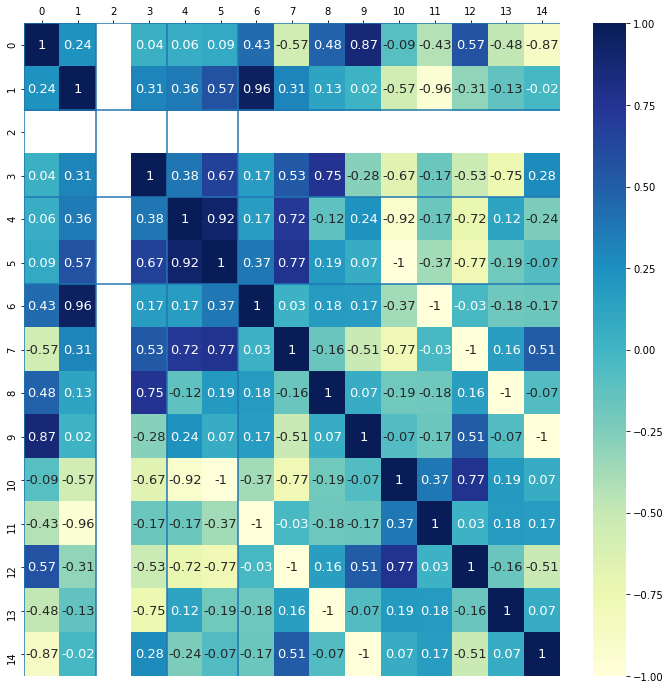

In [35]:
#Create each matrix
U_1 = e_vector_1_1
temp = np.diag(np.sqrt(non_zero_1_1))
S_1 = np.zeros_like(data_1).astype(np.float64)
S_1[:temp.shape[0],:temp.shape[1]] = temp
V_1 = e_vector_1_2.T

print("-----------")
print("Created Matrix U : \n",U_1)
print("Created Matrix S : \n",S_1)
print("Created Matrix V : \n",V_1)

print("\n---------------")
reconstructed_1 = np.dot(U_1, S_1).dot(V_1)
print("Reconstructed matrix : \n", reconstructed_1)
print("Original matrix : \n",data_1)

df_1 = pd.DataFrame(np.hstack((data_1.T,reconstructed_1.T, -reconstructed_1.T)))
plt.figure(figsize=(12,12))
ax = sns.heatmap(np.around(df_1.corr(),2),annot=True,annot_kws={"size":13},cmap="YlGnBu")
ax.xaxis.tick_top()
ax.vlines([0,2,4,6], *ax.get_ylim())
ax.hlines([0,2,4,6], *ax.get_xlim())

In [50]:
# 1) Find SVD of the Matrix A
A3 = np.array(df3)
U, Σ, Vh = linalg.svd(A3)

print("Original Matrix A: \n",data_1); print("\n")
print("Decomposed Matrix U: \n",U); print("\n")
print("Decomposed Matrix Σ: \n",Σ); print("\n")
print("Decomposed Matrix Vh: \n",Vh)

Original Matrix A: 
 [[ 8  8 10 10 10  9  9  8 10 10  9 10  9 10 10 10 10 10 10  8 10 10 10 10]
 [ 7  9 10  8 10  9  8  9 10  8  9  8 10 10  9  8  9 10 10 10  9 10 10 10]
 [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10]
 [ 9  9  8 10 10  9  8  9 10  9 10  8  9 10  8  9 10  9  8 10  9 10 10 10]
 [ 7  7  7  7  7  8  7  8  9  7  9  8  9 10  7  8  7  8  7  8  9  8  8  8]]


Decomposed Matrix U: 
 [[-0.46323909 -0.71313771  0.02714656 -0.29056865 -0.4378094 ]
 [-0.44765835  0.15380692 -0.85189156  0.22299944  0.02230369]
 [-0.48669531 -0.19961313  0.26065075  0.0757784   0.80597834]
 [-0.44925779  0.30609141  0.4377135   0.59849301 -0.3933046 ]
 [-0.38250053  0.57813552  0.11837193 -0.70845244 -0.05946328]]


Decomposed Matrix Σ: 
 [100.5543535    4.06194459   3.49319497   3.14460436   2.28728006]


Decomposed Matrix Vh: 
 [[-0.18325709 -0.1921609  -0.19596482 -0.20882749 -0.20488453 -0.21409824
  -0.2013587  -0.20139051 -0.21029432 -0.1969227  -0.2088434  -0.20072

## 2. Unordered Matrix

In [45]:
# we create an array from the df
data_1 = np.array(df2)
#first part
w_1_1 = data_1.dot(data_1.T)
e_value_1_1, e_vector_1_1 = np.linalg.eigh(w_1_1)

#second stage
w_1_2 = data_1.T.dot(data_1)
e_value_1_2,e_vector_1_2 = np.linalg.eigh(w_1_2)

print("Original Data Shape: ", data_1.shape)
print("dot(A,A.T) Eigen Value: ", e_value_1_1.shape)
print("dot(A,A.T) Eigen Vector: ",e_vector_1_1.shape)
print("dot(A.T,A) Eigen Value: ",e_value_1_2.shape)
print("dot(A.T,A) Eigen Vector: ",e_vector_1_2.shape)

Original Data Shape:  (5, 24)
dot(A,A.T) Eigen Value:  (5,)
dot(A,A.T) Eigen Vector:  (5, 5)
dot(A.T,A) Eigen Value:  (24,)
dot(A.T,A) Eigen Vector:  (24, 24)


In [46]:
idx_1_1 = e_value_1_1.argsort()[::-1]
e_value_1_1 = e_value_1_1[idx_1_1]
e_vector_1_1 = e_vector_1_1[:,idx_1_1]

idx_1_2 = e_value_1_2.argsort()[::-1]
e_value_1_2 = e_value_1_2[idx_1_2]
e_vector_1_2 = e_vector_1_2[:,idx_1_2]

#compare the eigen vectors and see if their non zero elements are equal
rows_1_1 = np.nonzero(e_value_1_1)
rows_1_2 = np.nonzero(e_value_1_2)
non_zero_1_1 = e_value_1_1[rows_1_1].copy()
non_zero_1_2 = e_value_1_2[rows_1_2].copy()

print("Sqrt Root Sum of One : ", np.sqrt(non_zero_1_1**2).sum())
print("Sqrt Root Sum of Two : ", np.sqrt(non_zero_1_2**2).sum())

print("\n----------")
print("Number of Non Zero Eigen Values ", (non_zero_1_1!=0).sum())
print("Number of Non Zero Eigen Values ", (non_zero_1_2!=0).sum())

print("\n----------")
print("Number of Small Eigen Values ", (non_zero_1_1>1e-5).sum())
print("Number of Small Eigen Values ", (non_zero_1_2>1e-5).sum())

print(non_zero_1_1)
print(non_zero_1_2)

Sqrt Root Sum of One :  10155.000000000002
Sqrt Root Sum of Two :  10155.000000000005

----------
Number of Non Zero Eigen Values  5
Number of Non Zero Eigen Values  24

----------
Number of Small Eigen Values  5
Number of Small Eigen Values  5
[1.01111780e+04 1.64993939e+01 1.22024111e+01 9.88853655e+00
 5.23165005e+00]
[ 1.01111780e+04  1.64993939e+01  1.22024111e+01  9.88853655e+00
  5.23165005e+00  1.32944848e-12  5.62120595e-14  4.56743532e-14
  3.80308320e-14  2.76863697e-14  1.76975708e-14  1.02236422e-14
  6.88245176e-15  7.06984845e-31 -8.56887194e-16 -2.34692135e-15
 -7.32262816e-15 -1.47645334e-14 -3.33503574e-14 -3.80884474e-14
 -4.88531161e-14 -5.68351652e-14 -3.82298807e-13 -4.28672794e-13]


-----------
Created Matrix U : 
 [[ 0.46323909  0.71313771  0.02714656  0.29056865  0.4378094 ]
 [ 0.44765835 -0.15380692 -0.85189156 -0.22299944 -0.02230369]
 [ 0.48669531  0.19961313  0.26065075 -0.0757784  -0.80597834]
 [ 0.44925779 -0.30609141  0.4377135  -0.59849301  0.3933046 ]
 [ 0.38250053 -0.57813552  0.11837193  0.70845244  0.05946328]]
Created Matrix S : 
 [[100.5543535    0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [  0.           4.06194459   0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [  0.           0.           3.49319497   0.   

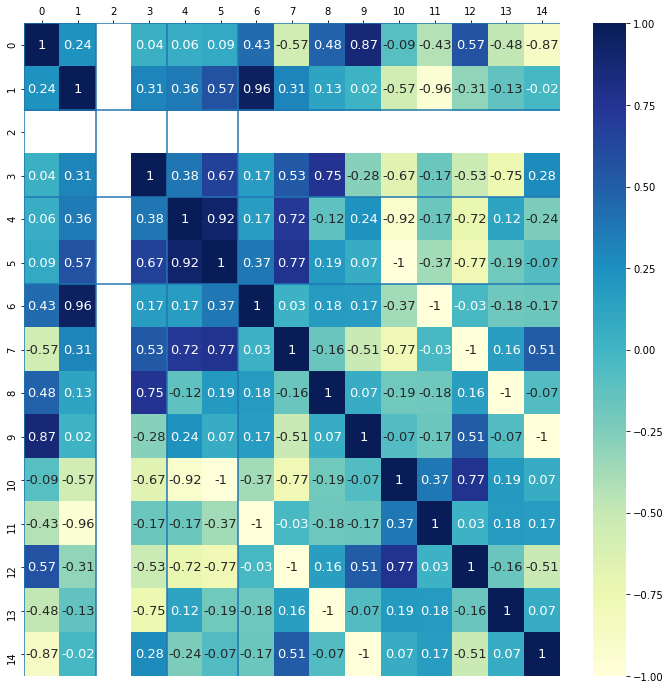

In [47]:
#Create each matrix
U_1 = e_vector_1_1
temp = np.diag(np.sqrt(non_zero_1_1))
S_1 = np.zeros_like(data_1).astype(np.float64)
S_1[:temp.shape[0],:temp.shape[1]] = temp
V_1 = e_vector_1_2.T

print("-----------")
print("Created Matrix U : \n",U_1)
print("Created Matrix S : \n",S_1)
print("Created Matrix V : \n",V_1)

print("\n---------------")
reconstructed_1 = np.dot(U_1, S_1).dot(V_1)
print("Reconstructed matrix : \n", reconstructed_1)
print("Original matrix : \n",data_1)

df_1 = pd.DataFrame(np.hstack((data_1.T,reconstructed_1.T, -reconstructed_1.T)))
plt.figure(figsize=(12,12))
ax = sns.heatmap(np.around(df_1.corr(),2),annot=True,annot_kws={"size":13},cmap="YlGnBu")
ax.xaxis.tick_top()
ax.vlines([0,2,4,6], *ax.get_ylim())
ax.hlines([0,2,4,6], *ax.get_xlim())

In [51]:
# 1) Find SVD of the Matrix A
A2 = np.array(df3)
U, Σ, Vh = linalg.svd(A2)

print("Original Matrix A: \n",data_1); print("\n")
print("Decomposed Matrix U: \n",U); print("\n")
print("Decomposed Matrix Σ: \n",Σ); print("\n")
print("Decomposed Matrix Vh: \n",Vh)

Original Matrix A: 
 [[ 8  8 10 10 10  9  9  8 10 10  9 10  9 10 10 10 10 10 10  8 10 10 10 10]
 [ 7  9 10  8 10  9  8  9 10  8  9  8 10 10  9  8  9 10 10 10  9 10 10 10]
 [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10]
 [ 9  9  8 10 10  9  8  9 10  9 10  8  9 10  8  9 10  9  8 10  9 10 10 10]
 [ 7  7  7  7  7  8  7  8  9  7  9  8  9 10  7  8  7  8  7  8  9  8  8  8]]


Decomposed Matrix U: 
 [[-0.46323909 -0.71313771  0.02714656 -0.29056865 -0.4378094 ]
 [-0.44765835  0.15380692 -0.85189156  0.22299944  0.02230369]
 [-0.48669531 -0.19961313  0.26065075  0.0757784   0.80597834]
 [-0.44925779  0.30609141  0.4377135   0.59849301 -0.3933046 ]
 [-0.38250053  0.57813552  0.11837193 -0.70845244 -0.05946328]]


Decomposed Matrix Σ: 
 [100.5543535    4.06194459   3.49319497   3.14460436   2.28728006]


Decomposed Matrix Vh: 
 [[-0.18325709 -0.1921609  -0.19596482 -0.20882749 -0.20488453 -0.21409824
  -0.2013587  -0.20139051 -0.21029432 -0.1969227  -0.2088434  -0.20072

## How can you support the description of your affinities, according to individual qualifications by using SVD or Neural Networks?


Solution: 
Using the SVD theory we were able to deduce the following, the affinity of data is based on a categorization method in which the data, in this case classify several concepts that are the qualifications for skills in various categories in various categories. This method is usually used by a team to organize a large amount of data according to the natural relationships between them, for which we obtained the following classification:

## How can you describe your team opportunity areas? Define a metric to calculate the groups by using SVD OR Neural Networks with/without Dataiku ?
To answer this question, we must think about the strengths of each member of the study team since in some way they would be the areas of opportunity for each one, so we must think how our skills would work together, it would be to think that thanks to our skills such as we can improve our way of studying and share it with team members.
Think so that if our method of study together with our abilities allows us to get very good grades by merging it with other different skills, try to predict how the behavior and the results to be obtained would be, considering the error metric of each one in based on their qualifications that have already been analyzed, since at some point our study method fails or the results that we want are not obtained.
